In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Amazon Sales Dataset
dataset_path = '/Users/aadithyaram/Desktop/amznsalesdata.csv'
sales_data = pd.read_csv(dataset_path)
sales_data.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [167]:
sales_data.shape

(100, 14)

In [168]:
sales_data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [169]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [170]:
sales_data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [171]:
sales_data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [172]:
#datetime formatting
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data['Ship Date'] = pd.to_datetime(sales_data['Ship Date'])
sales_data['Order Month'] = sales_data['Order Date'].dt.month
sales_data['Order Year'] = sales_data['Order Date'].dt.year

In [173]:
# Monthly sales trend
monthly_sales = sales_data.groupby('Order Month')['Total Revenue'].sum()

# Yearly sales trend
yearly_sales = sales_data.groupby('Order Year')['Total Revenue'].sum()

# Yearly month-wise sales trend
yearly_monthly_sales = sales_data.groupby(['Order Year', 'Order Month'])['Total Revenue'].sum()


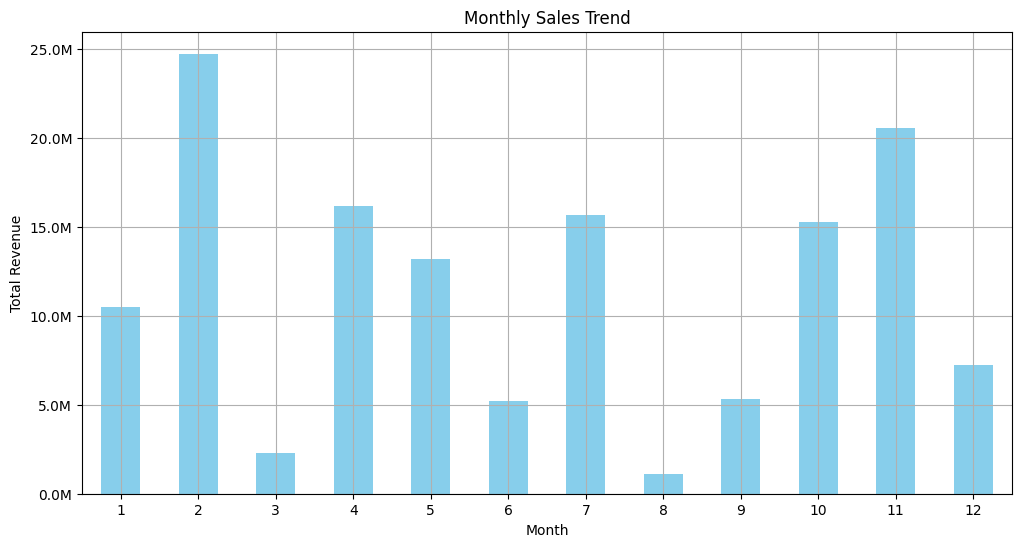

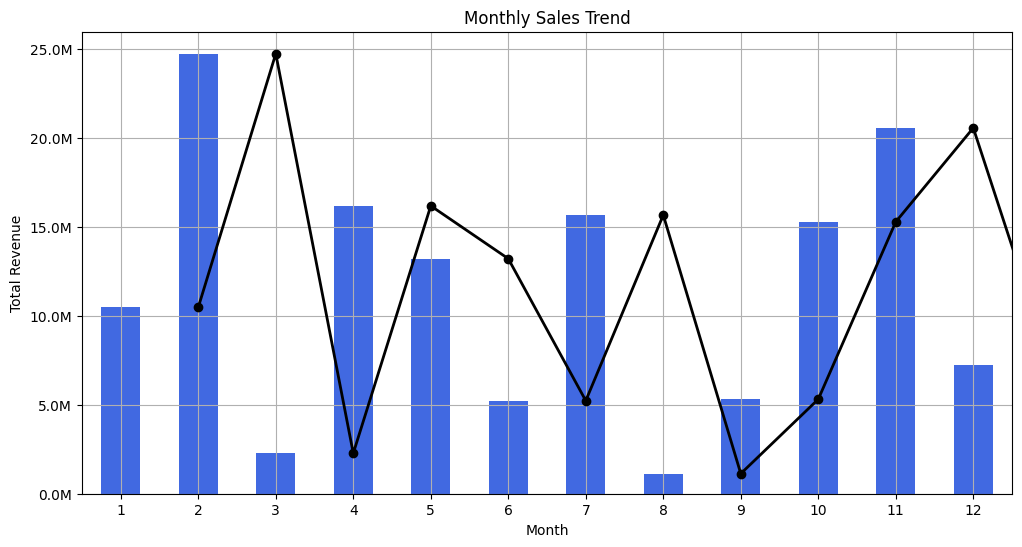

In [174]:
#Convienient Labelling 
def format_millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

# Monthly Sales Trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_millions))
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='royalblue', ax=ax)
monthly_sales.plot(kind='line', marker='o', color='black', linewidth=2, ax=ax)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_millions))
plt.xticks(rotation=0)
plt.grid(True)
plt.show()



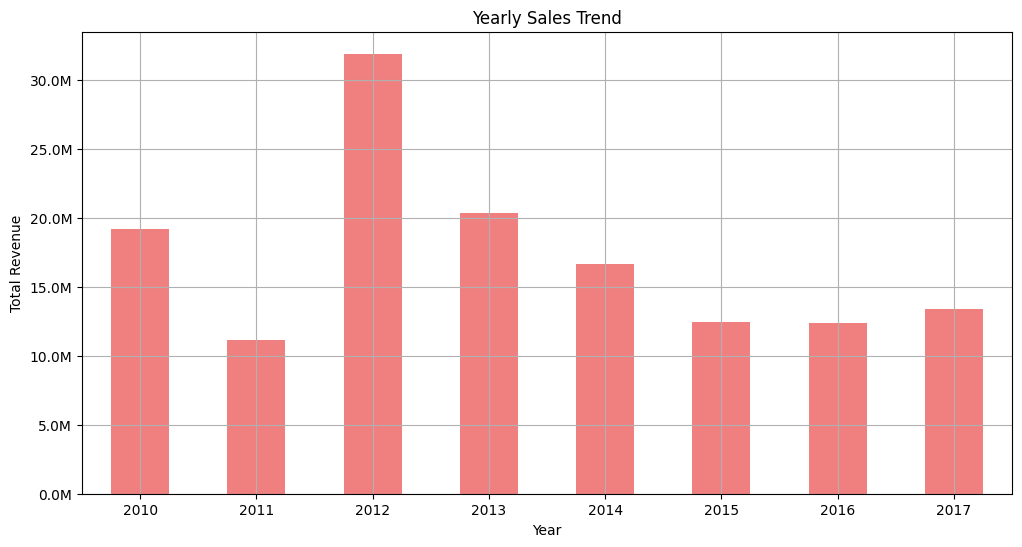

In [175]:
# Yearly Sales Trend
plt.figure(figsize=(12, 6))
yearly_sales.plot(kind='bar', color='lightcoral')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_millions))
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


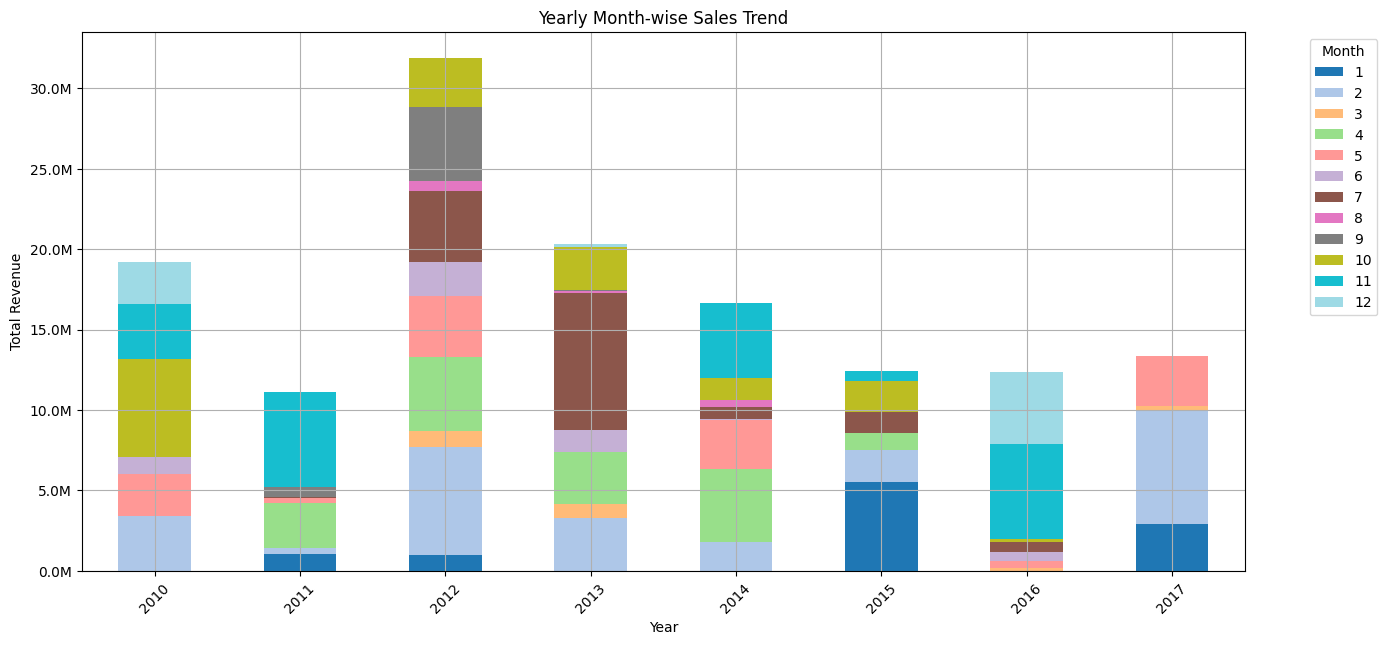

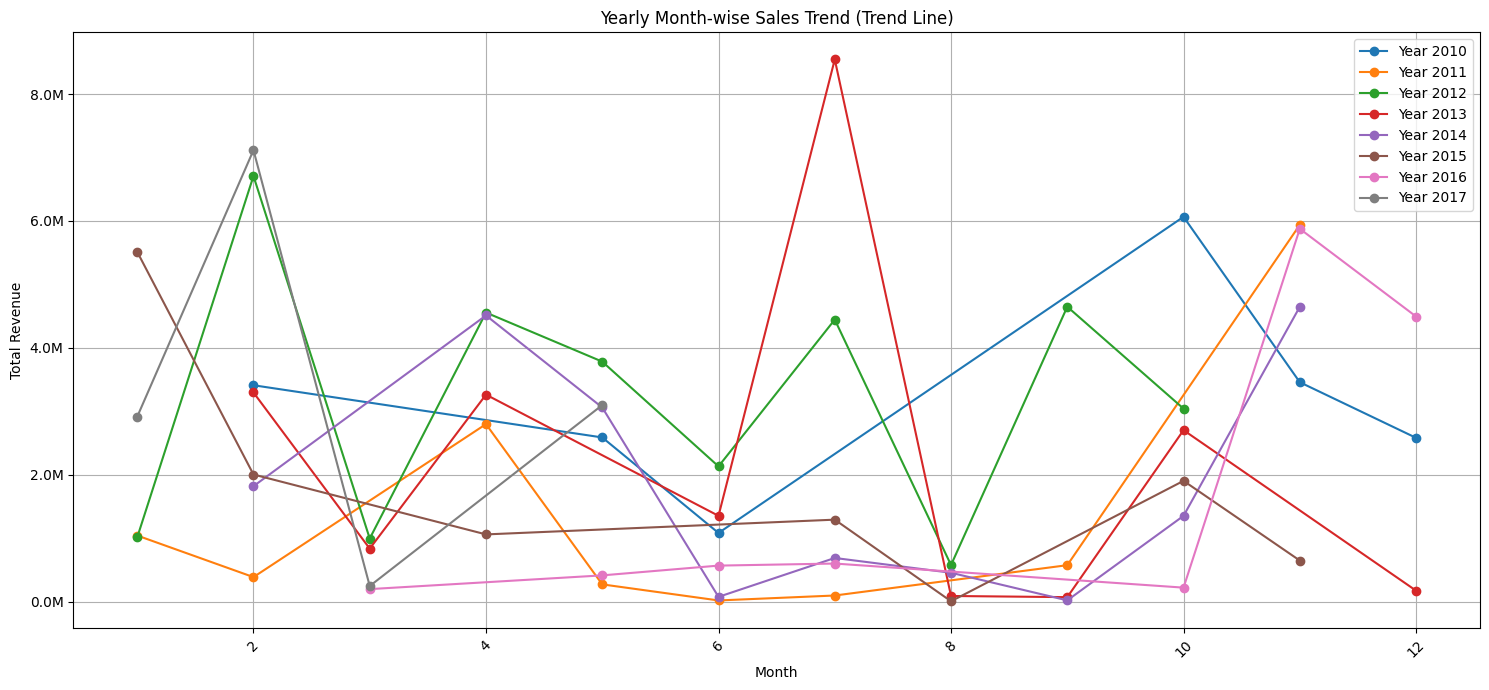

In [176]:
#Yearly-Monthly Trend

yearly_monthly_sales.unstack().plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab20')
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_millions))
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
fig, ax = plt.subplots(figsize=(15, 7))
for year in yearly_monthly_sales.index.levels[0]:
    yearly_data = yearly_monthly_sales.loc[year]
    yearly_data.plot(kind='line', marker='o', label=f'Year {year}', ax=ax)
plt.title('Yearly Month-wise Sales Trend (Trend Line)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_millions))
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


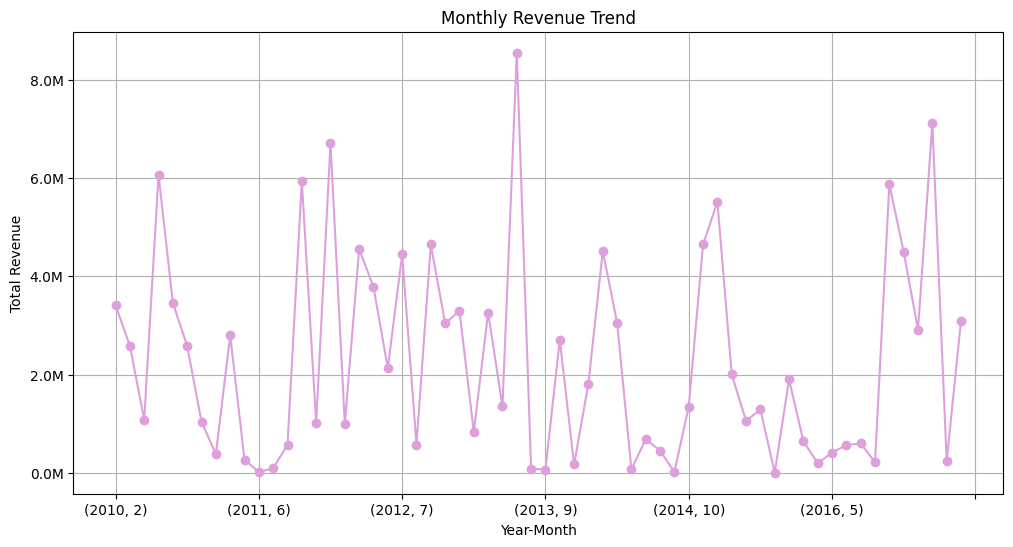

In [177]:
# Monthly revenue trend
monthly_revenue = new_sales_data.groupby(['Order Year', 'Order Month'])['Total Revenue'].sum()
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='plum')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_millions))
plt.title('Monthly Revenue Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


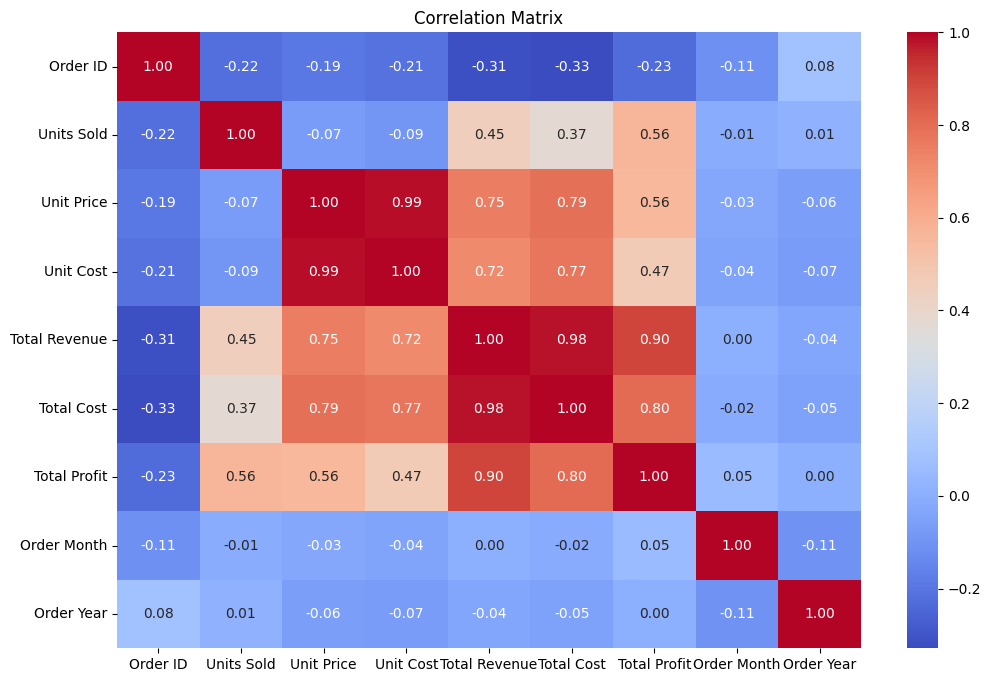

In [178]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
numeric_cols = sales_data.select_dtypes(include=[np.number]).columns
correlation_matrix = sales_data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


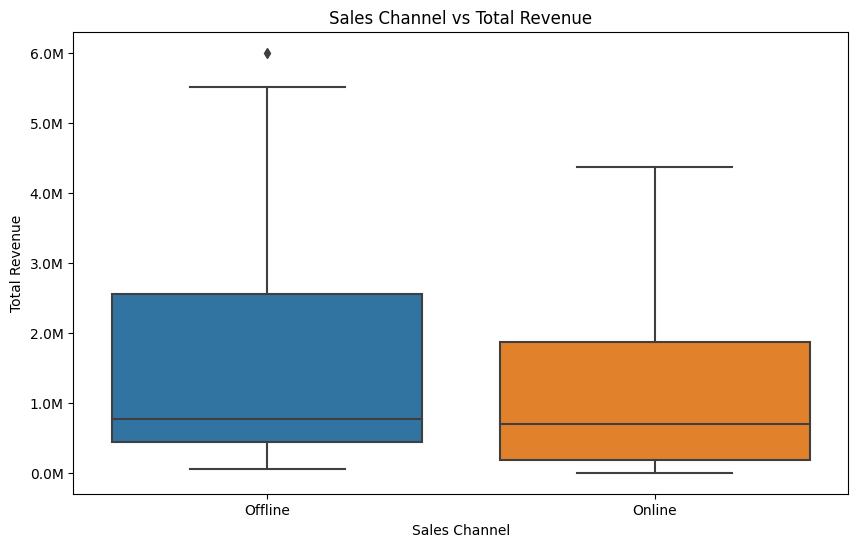

In [179]:
# Sales Channel vs Total Revenue
plt.figure(figsize=(10, 6))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_millions))
sns.boxplot(x='Sales Channel', y='Total Revenue', data=sales_data)
plt.title('Sales Channel vs Total Revenue')
plt.show()


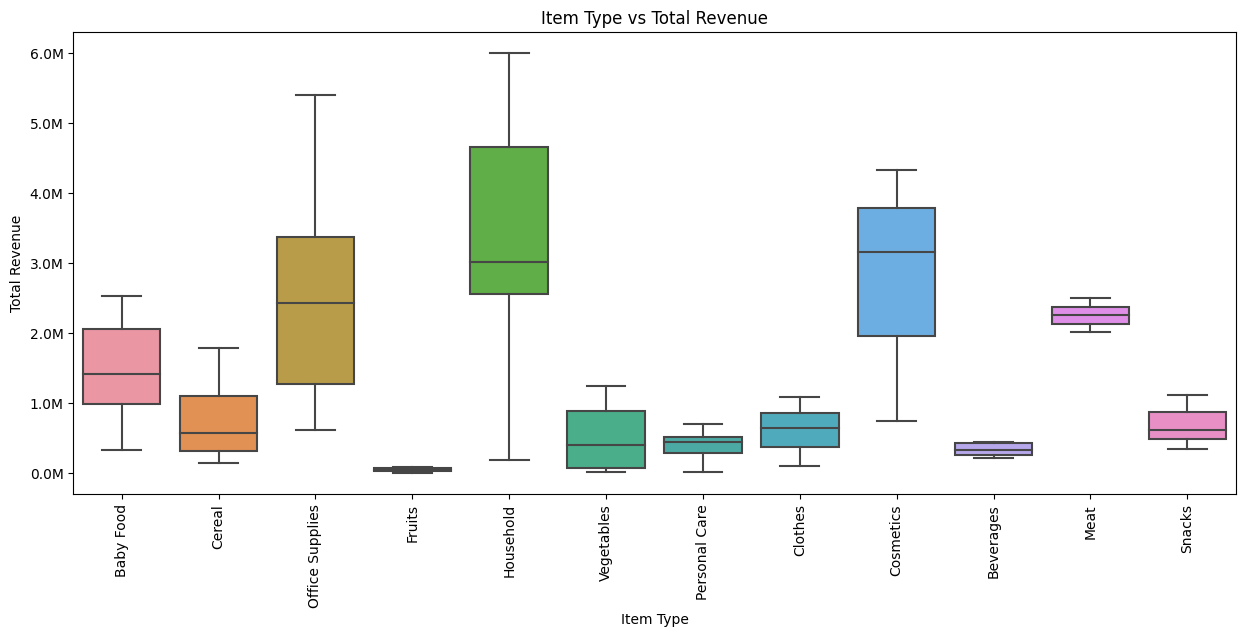

In [180]:
# Item Type vs Total Revenue
plt.figure(figsize=(15, 6))
sns.boxplot(x='Item Type', y='Total Revenue', data=sales_data)
plt.xticks(rotation=90)
plt.title('Item Type vs Total Revenue')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_millions))
plt.show()

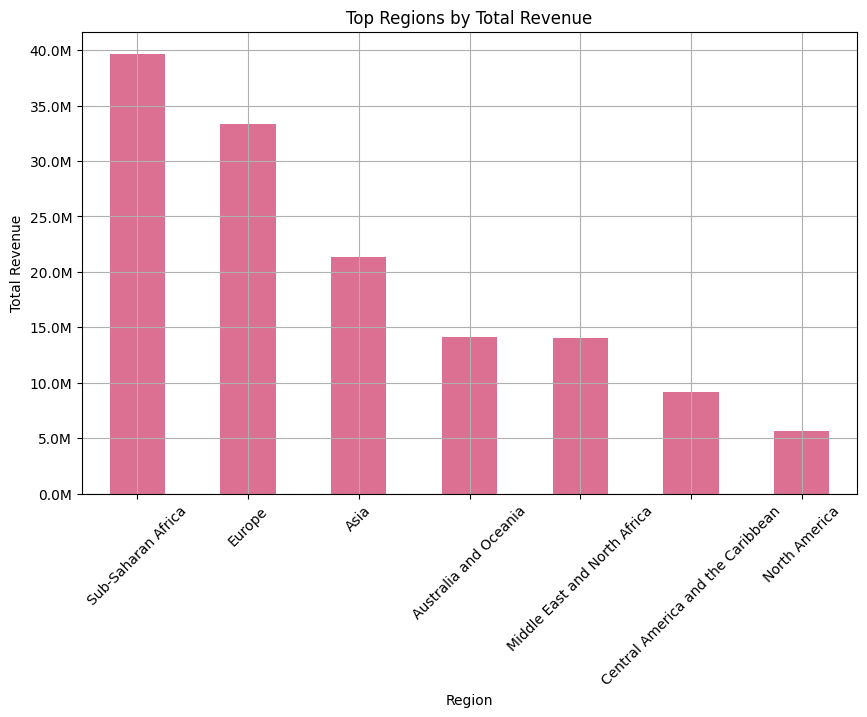

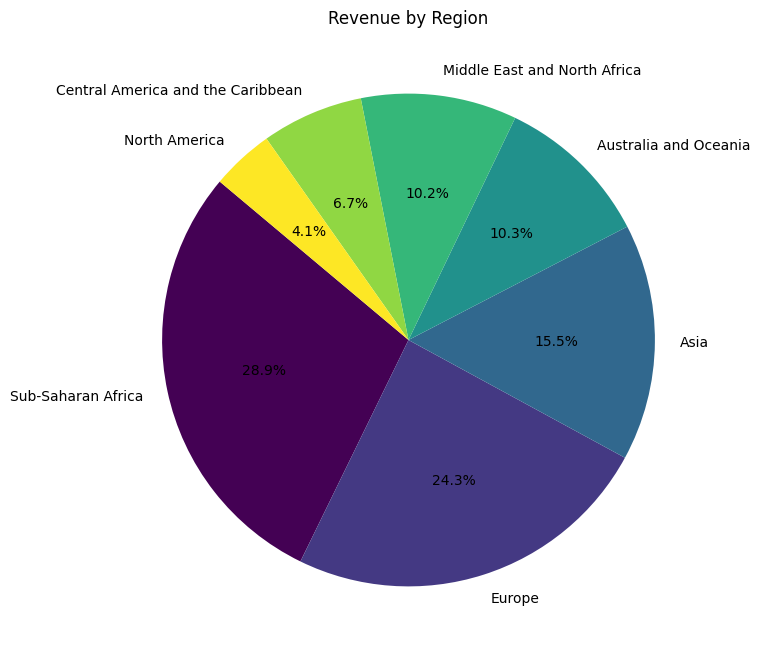

In [181]:
# Top regions where revenue is highest
top_regions = new_sales_data.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_regions.plot(kind='bar', color='palevioletred')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_millions))
plt.title('Top Regions by Total Revenue')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
print("\n")
print("\n")
print("\n")
print("\n")
plt.figure(figsize=(10, 8))
top_regions.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis')
plt.title('Revenue by Region')
plt.ylabel('')
plt.show()



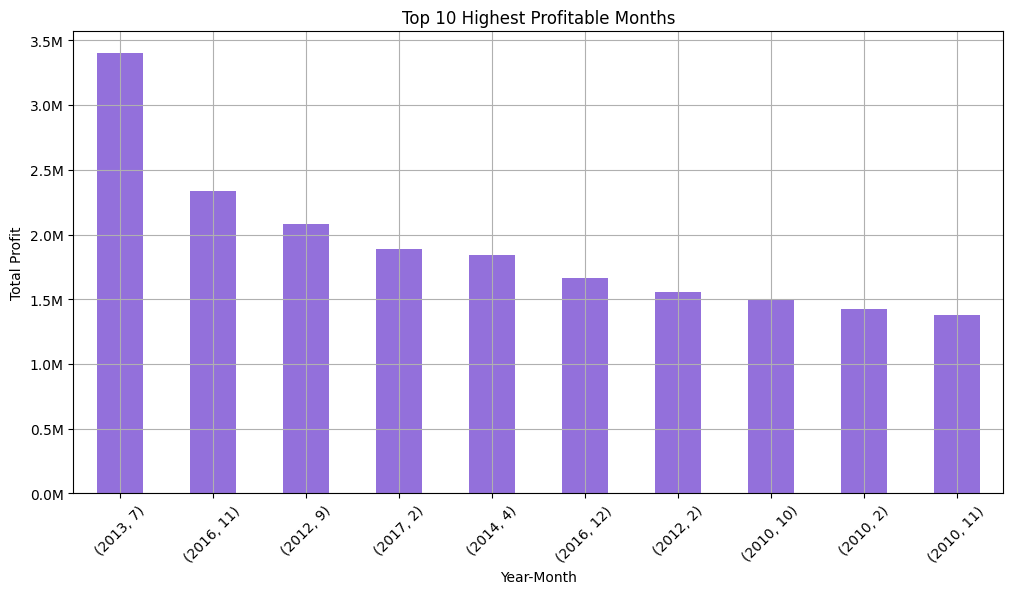

In [182]:
# Top 10 highest profitable months
top_months = new_sales_data.groupby(['Order Year', 'Order Month'])['Total Profit'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_months.plot(kind='bar', color='mediumpurple')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_millions))
plt.title('Top 10 Highest Profitable Months')
plt.xlabel('Year-Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


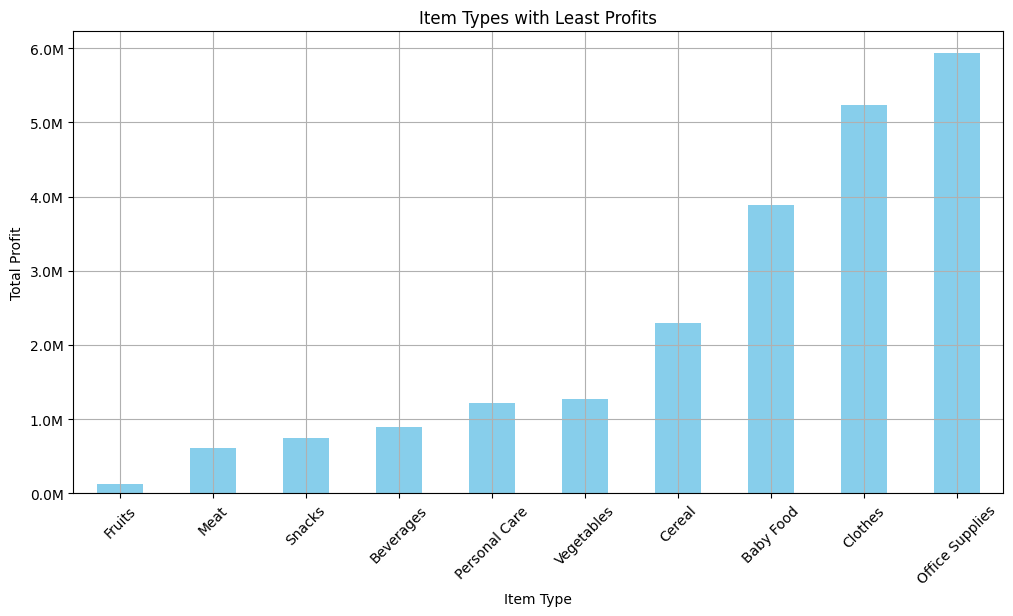

In [183]:
# Item types with least profits
least_profitable_items = new_sales_data.groupby('Item Type')['Total Profit'].sum().nsmallest(10)
plt.figure(figsize=(12, 6))
least_profitable_items.plot(kind='bar', color='skyblue')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_millions))
plt.title('Item Types with Least Profits')
plt.xlabel('Item Type')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




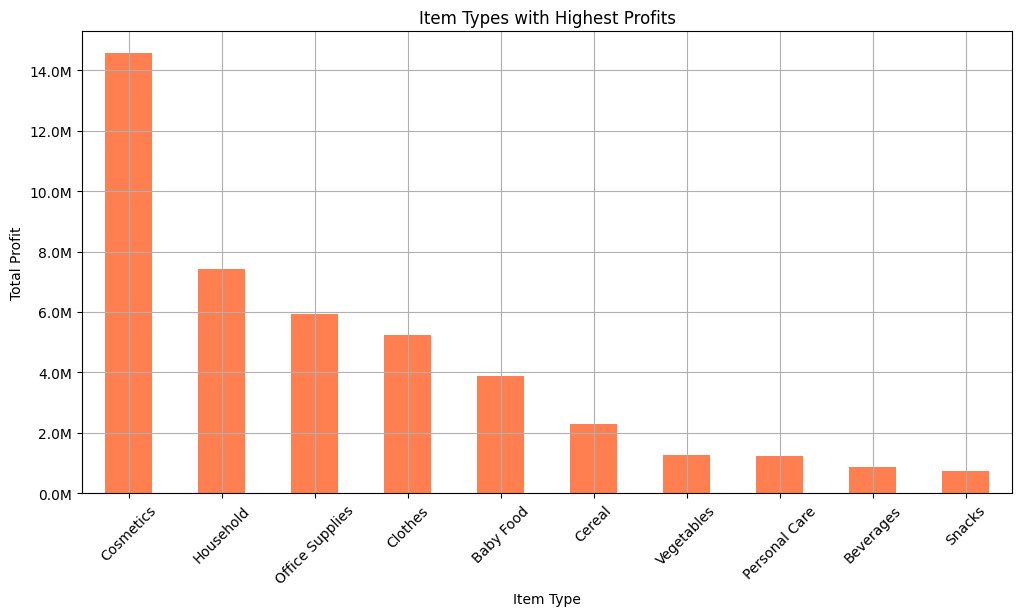

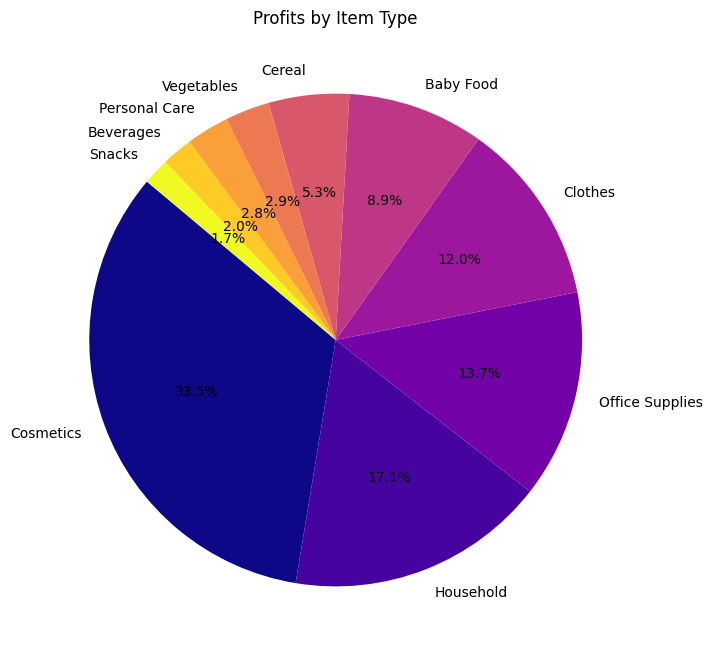

In [184]:
# Item types with highest profits
most_profitable_items = new_sales_data.groupby('Item Type')['Total Profit'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
most_profitable_items.plot(kind='bar', color='coral')
plt.title('Item Types with Highest Profits')
plt.xlabel('Item Type')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_millions))
plt.show()
print("\n")
plt.figure(figsize=(10, 8))
most_profitable_items.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='plasma')
plt.title('Profits by Item Type')
plt.ylabel('')
print("\n")
print("\n")
plt.show()



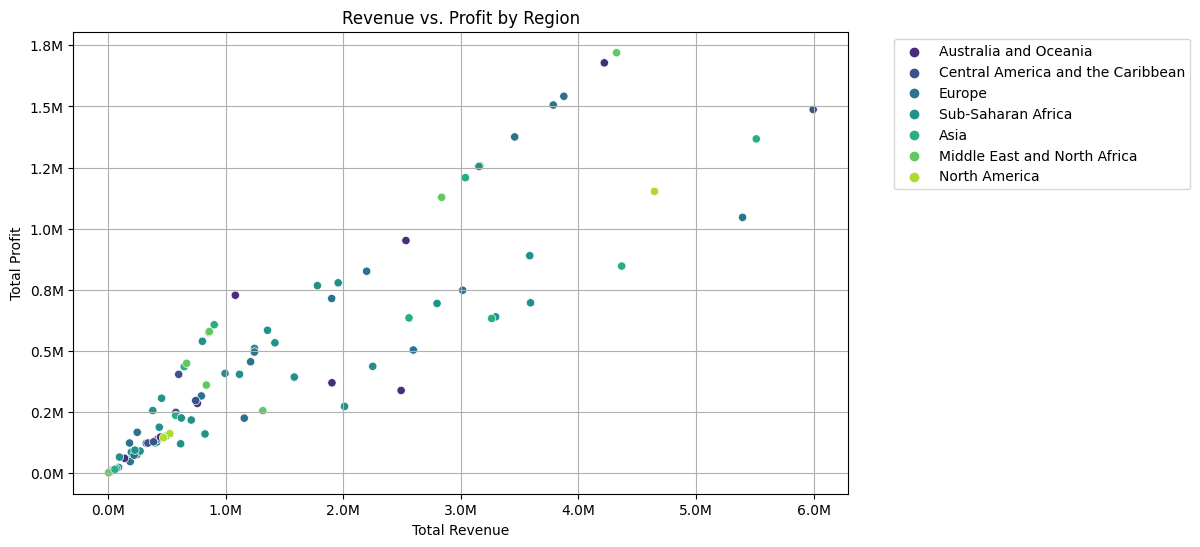

In [185]:
# Scatter plot for revenue vs. profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_sales_data, x='Total Revenue', y='Total Profit', hue='Region', palette='viridis')
plt.title('Revenue vs. Profit by Region')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_millions))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_millions))
plt.xlabel('Total Revenue')
plt.ylabel('Total Profit')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [186]:
#Key metrics
total_revenue = sales_data['Total Revenue'].sum()
total_cost = sales_data['Total Cost'].sum()
total_profit = sales_data['Total Profit'].sum()
average_order_value = sales_data['Total Revenue'].mean()
print(f'Total Revenue: ${total_revenue:,.2f}')
print("\n")
print(f'Total Cost: ${total_cost:,.2f}')
print("\n")
print(f'Total Profit: ${total_profit:,.2f}')
print("\n")
print(f'Average Order Value: ${average_order_value:,.2f}')


Total Revenue: $137,348,768.31


Total Cost: $93,180,569.91


Total Profit: $44,168,198.40


Average Order Value: $1,373,487.68


In [187]:
#1 Total sales per month
print("\n")
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data['Order Month'] = sales_data['Order Date'].dt.month
sales_data['Order Year'] = sales_data['Order Date'].dt.year
total_sales_per_month = sales_data.groupby(['Order Year', 'Order Month'])['Total Revenue'].sum()
for (year, month), total_revenue in total_sales_per_month.items():
    print(f'Total Revenue for {month}/{year}: ${total_revenue:,.2f}')





Total Revenue for 2/2010: $3,410,661.12
Total Revenue for 5/2010: $2,587,973.26
Total Revenue for 6/2010: $1,082,418.40
Total Revenue for 10/2010: $6,064,933.75
Total Revenue for 11/2010: $3,458,252.00
Total Revenue for 12/2010: $2,581,786.39
Total Revenue for 1/2011: $1,042,225.35
Total Revenue for 2/2011: $387,002.20
Total Revenue for 4/2011: $2,798,046.49
Total Revenue for 5/2011: $272,410.45
Total Revenue for 6/2011: $19,103.44
Total Revenue for 7/2011: $97,040.64
Total Revenue for 9/2011: $574,951.92
Total Revenue for 11/2011: $5,938,385.58
Total Revenue for 1/2012: $1,012,884.00
Total Revenue for 2/2012: $6,707,849.42
Total Revenue for 3/2012: $994,765.42
Total Revenue for 4/2012: $4,556,012.38
Total Revenue for 5/2012: $3,782,781.82
Total Revenue for 6/2012: $2,132,075.27
Total Revenue for 7/2012: $4,445,093.92
Total Revenue for 8/2012: $576,782.80
Total Revenue for 9/2012: $4,648,152.72
Total Revenue for 10/2012: $3,042,246.77
Total Revenue for 2/2013: $3,296,425.02
Total Rev

In [188]:
#2 Average sales per day
print("\n")
average_sales_per_day = sales_data.groupby(sales_data['Order Date'].dt.date)['Total Revenue'].sum().mean()
print(f'Average sales per day: ${average_sales_per_day:,.2f}')
print("\n")

#3 Growth rate month-over-month
monthly_revenue = sales_data.resample('M', on='Order Date')['Total Revenue'].sum()
growth_rate_monthly = monthly_revenue.pct_change()
for date, growth_rate in growth_rate_monthly.dropna().items():
    print(f'Growth Rate for {date.strftime("%B %Y")}: {growth_rate:.2%}')



Average sales per day: $1,373,487.68


Growth Rate for March 2010: -100.00%
Growth Rate for May 2010: inf%
Growth Rate for June 2010: -58.18%
Growth Rate for July 2010: -100.00%
Growth Rate for October 2010: inf%
Growth Rate for November 2010: -42.98%
Growth Rate for December 2010: -25.34%
Growth Rate for January 2011: -59.63%
Growth Rate for February 2011: -62.87%
Growth Rate for March 2011: -100.00%
Growth Rate for April 2011: inf%
Growth Rate for May 2011: -90.26%
Growth Rate for June 2011: -92.99%
Growth Rate for July 2011: 407.97%
Growth Rate for August 2011: -100.00%
Growth Rate for September 2011: inf%
Growth Rate for October 2011: -100.00%
Growth Rate for November 2011: inf%
Growth Rate for December 2011: -100.00%
Growth Rate for January 2012: inf%
Growth Rate for February 2012: 562.25%
Growth Rate for March 2012: -85.17%
Growth Rate for April 2012: 358.00%
Growth Rate for May 2012: -16.97%
Growth Rate for June 2012: -43.64%
Growth Rate for July 2012: 108.49%
Growth Rate for 

In [189]:
#4 Total annual revenue
total_annual_revenue = sales_data.resample('Y', on='Order Date')['Total Revenue'].sum()
for year, total_revenue in total_annual_revenue.items():
    print(f'Total Revenue for {year}: ${total_revenue:,.2f}')
print("\n")

#5 Year-over-year growth
yearly_revenue = sales_data.resample('Y', on='Order Date')['Total Revenue'].sum()
year_over_year_growth = yearly_revenue.pct_change()
for year, growth_rate in year_over_year_growth.dropna().items():
    print(f'Year-over-Year Growth Rate for {year}: {growth_rate:.2%}')


Total Revenue for 2010-12-31 00:00:00: $19,186,024.92
Total Revenue for 2011-12-31 00:00:00: $11,129,166.07
Total Revenue for 2012-12-31 00:00:00: $31,898,644.52
Total Revenue for 2013-12-31 00:00:00: $20,330,448.66
Total Revenue for 2014-12-31 00:00:00: $16,630,214.43
Total Revenue for 2015-12-31 00:00:00: $12,427,982.86
Total Revenue for 2016-12-31 00:00:00: $12,372,867.22
Total Revenue for 2017-12-31 00:00:00: $13,373,419.63


Year-over-Year Growth Rate for 2011-12-31 00:00:00: -41.99%
Year-over-Year Growth Rate for 2012-12-31 00:00:00: 186.62%
Year-over-Year Growth Rate for 2013-12-31 00:00:00: -36.27%
Year-over-Year Growth Rate for 2014-12-31 00:00:00: -18.20%
Year-over-Year Growth Rate for 2015-12-31 00:00:00: -25.27%
Year-over-Year Growth Rate for 2016-12-31 00:00:00: -0.44%
Year-over-Year Growth Rate for 2017-12-31 00:00:00: 8.09%


In [190]:
#6 Average monthly sales per year
average_monthly_sales_per_year = sales_data.groupby(sales_data['Order Year'])['Total Revenue'].mean()
for year, avg_monthly_sales in average_monthly_sales_per_year.items():
    print(f'Average Monthly Sales for {year}: ${avg_monthly_sales:,.2f}')


Average Monthly Sales for 2010: $1,918,602.49
Average Monthly Sales for 2011: $927,430.51
Average Monthly Sales for 2012: $1,449,938.39
Average Monthly Sales for 2013: $1,694,204.05
Average Monthly Sales for 2014: $1,108,680.96
Average Monthly Sales for 2015: $1,129,816.62
Average Monthly Sales for 2016: $1,237,286.72
Average Monthly Sales for 2017: $1,671,677.45


In [191]:
#7 Percentage contribution of each month to total annual sales
monthly_contribution = total_sales_per_month.groupby('Order Year').apply(lambda x: x / x.sum())
percentage_contribution = monthly_contribution.reset_index(level=0, drop=True)
for (year, month), contribution in percentage_contribution.items():
    print(f'Percentage Contribution of {month}/{year} to Total Annual Sales: {contribution:.2%}')

Percentage Contribution of 2/2010 to Total Annual Sales: 17.78%
Percentage Contribution of 5/2010 to Total Annual Sales: 13.49%
Percentage Contribution of 6/2010 to Total Annual Sales: 5.64%
Percentage Contribution of 10/2010 to Total Annual Sales: 31.61%
Percentage Contribution of 11/2010 to Total Annual Sales: 18.02%
Percentage Contribution of 12/2010 to Total Annual Sales: 13.46%
Percentage Contribution of 1/2011 to Total Annual Sales: 9.36%
Percentage Contribution of 2/2011 to Total Annual Sales: 3.48%
Percentage Contribution of 4/2011 to Total Annual Sales: 25.14%
Percentage Contribution of 5/2011 to Total Annual Sales: 2.45%
Percentage Contribution of 6/2011 to Total Annual Sales: 0.17%
Percentage Contribution of 7/2011 to Total Annual Sales: 0.87%
Percentage Contribution of 9/2011 to Total Annual Sales: 5.17%
Percentage Contribution of 11/2011 to Total Annual Sales: 53.36%
Percentage Contribution of 1/2012 to Total Annual Sales: 3.18%
Percentage Contribution of 2/2012 to Total A